In [18]:
import pickle
import numpy as np

import matplotlib.pyplot as plt

In [107]:
population_as_list = [[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16] for i in range(1)] + \
               [[4, 2, 5, 7, 11] for i in range(1)] + \
               [[4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34]] + \
               [[1, 20, 22, 23, 21, 29]]


In [108]:
population_as_list

[[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16],
 [4, 2, 5, 7, 11],
 [4, 24, 19, 18, 25, 30, 27, 26, 28, 31, 32, 33, 34],
 [1, 20, 22, 23, 21, 29]]

In [5]:
n_to_sp = pickle.load(open("../../data/dicts/ES3_n_to_cl", 'rb'))

In [23]:
str_0 = ' '.join([n_to_sp[x] for x in population_as_list[0]])

In [24]:
str_0

'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT ACACGCCCTTATCAAATAGCTGTGATTTACC ATAGACCCCGAACAACAATACGCGCAAACCG TACCGTACAGACTGCCGGATATTATTTTTTT CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG TGCATGGCTTTGGCTTCCTCTTTGACGGACG ATATATCAGAGCAAAAAACAAAGCCACAGCC CATAAAGAAACTATTTTGCGTTTCGTTCAGG TTTTACAGTGTCAACAATCGTTCCCTGATTG CCGCCGTTGGCACCGTCAAACTCCGGTACTG TATAGAGATCGTTTTTGGAATTTACAGCGAG CCGTAAGTGGTTTGAGCGATGATATTTGTGC'

In [25]:
n_to_sp

{0: 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 1: 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 2: 'AGTGCTGGACCATTTCAAATTCACAATAGAT',
 3: 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 4: 'CAAGTGATATCCATCATCGCATCCAGTGCGC',
 5: 'GGAATGATATTTCAATAAATAATTATAACAA',
 6: 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 7: 'CCCTCACACCGATTCGCCAAACGGTGGAGAA',
 8: 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 9: 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 10: 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 11: 'AGCTGGGCGAAATTTTGATTCATCGTGATGA',
 12: 'TATAGAGATCGTTTTTGGAATTTACAGCGAG',
 13: 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 14: 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 15: 'TTTTACAGTGTCAACAATCGTTCCCTGATTG',
 16: 'CCGTAAGTGGTTTGAGCGATGATATTTGTGC',
 17: 'CCGCCGTTGGCACCGTCAAACTCCGGTACTG',
 18: 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 19: 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 20: 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 21: 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 22: 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 23: 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 24: 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 25: 'CCGG

In [11]:
cumsum = np.zeros((2, len(str_0) + 1))

for i, char in enumerate(str_0):
    cumsum[:, i+1] = cumsum[:, i]
    if char == 'A' or char == 'T':
        cumsum[0, i+1] += 1
    else:
        cumsum[1, i+1] += 1

In [15]:
cumsum[:,:10]

array([[0., 0., 1., 1., 2., 2., 3., 4., 4., 4.],
       [0., 1., 1., 2., 2., 3., 3., 3., 4., 5.]])

In [16]:
str_0[:10]

'GACAGAACGG'

In [17]:
stats = []
for i in range(20, len(str_0)):
    stats.append( (cumsum[0,i] - cumsum[0,i - 20]) / (cumsum[:,i] - cumsum[:,i-20]).sum() )

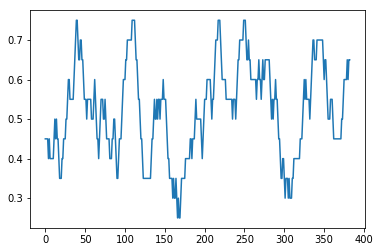

In [19]:
plt.plot(stats)
plt.show()

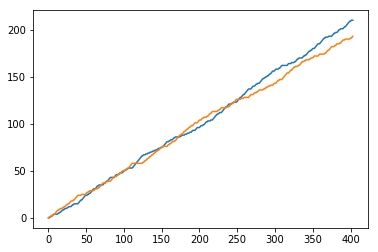

In [20]:
plt.plot(cumsum[0])
plt.plot(cumsum[1])
plt.show()

In [33]:
def count_GC(sp):
    s = 0
    for c in sp:
        if c == 'C' or c == 'G':
            s +=1
    return s

In [37]:
population_as_list[0]

[1, 0, 3, 6, 8, 9, 10, 13, 14, 15, 17, 12, 16]

In [36]:
[count_GC(n_to_sp[x]) / len(n_to_sp[x]) for x in population_as_list[0]]

[0.5806451612903226,
 0.41935483870967744,
 0.5161290322580645,
 0.3548387096774194,
 0.5806451612903226,
 0.6451612903225806,
 0.5483870967741935,
 0.3870967741935484,
 0.3548387096774194,
 0.3870967741935484,
 0.6451612903225806,
 0.3548387096774194,
 0.45161290322580644]

In [39]:
population_as_list[1]

[4, 2, 5, 7, 11]

In [38]:
[count_GC(n_to_sp[x]) / len(n_to_sp[x]) for x in population_as_list[1]]

[0.5161290322580645,
 0.3548387096774194,
 0.16129032258064516,
 0.5806451612903226,
 0.41935483870967744]

In [83]:
gr = np.load("../../data/graphs/ES3_22.npy")[:35, :35]

In [101]:
idx = 3
weights = []
for a,b in zip(population_as_list[idx], population_as_list[idx][1:]):
    print(a,b, gr[a][b])
    weights.append(gr[a][b])

1 20 191.0
20 22 86.0
22 23 69.0
23 21 69.0
21 29 77.0


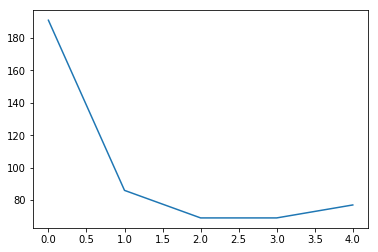

In [102]:
plt.plot(weights)
plt.show()

## Agregate stats

In [52]:
import sys
sys.path.append("../")
sys.path.append("../utils/")

In [59]:
from utils import utils

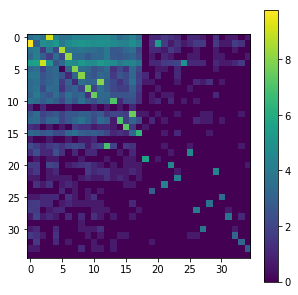

In [63]:
utils.plot_gr(gr, log = 1 , s = 5)

In [67]:
true_edges_weights = gr[np.arange(35), np.argmax(gr, 1)].astype(int)

In [72]:
gr.max(1).astype(int)

array([ 9224, 17455,  4956,  3815,  8568,  2941,  3022,  3059,  2268,
        1809,  1174,     2,  1845,  1067,  1432,   619,     2,  1019,
         102,   289,    86,    77,    69,    69,    18,    30,    38,
          52,    42,     1,    42,    24,    24,    14,     0])

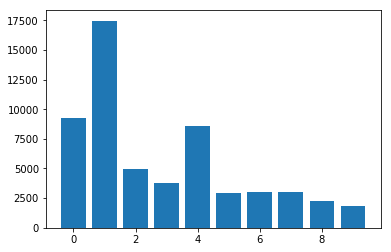

In [73]:
plt.bar(np.arange(35)[:10], true_edges_weights[:10])
plt.show()

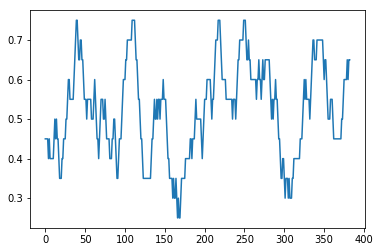

In [19]:
plt.plot(stats)
plt.show()

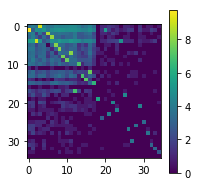

In [106]:
utils.plot_gr(gr, log =1, s =3)

In [109]:
true_weight = 0
for p in population_as_list:
    for i,j in zip(p, p[1:]):
        true_weight += gr[i,j]
        


In [112]:
(gr.sum() - true_weight) / true_weight

0.13704291073225777

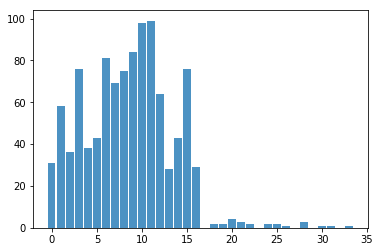

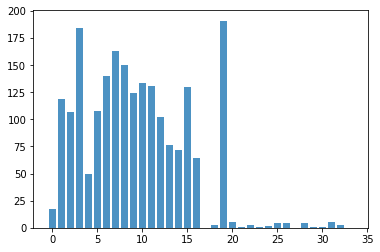

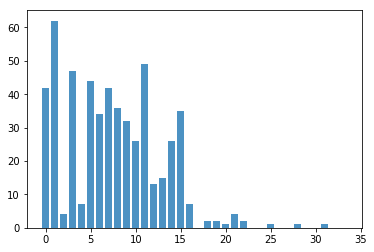

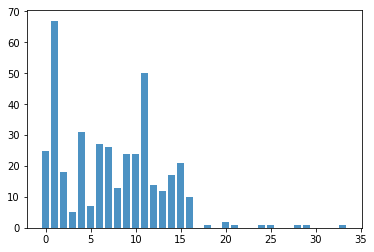

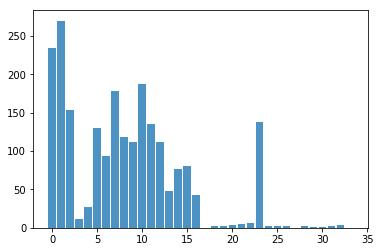

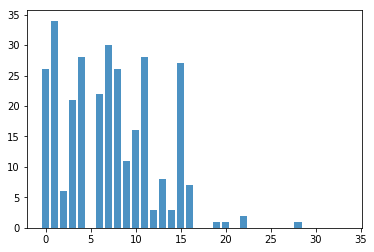

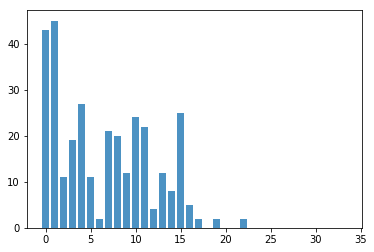

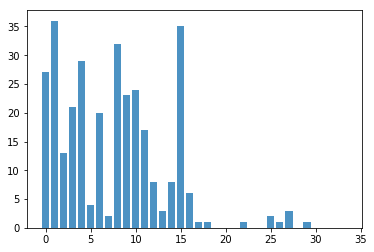

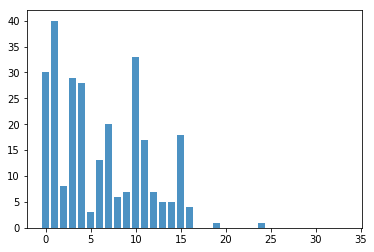

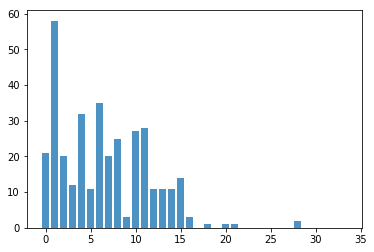

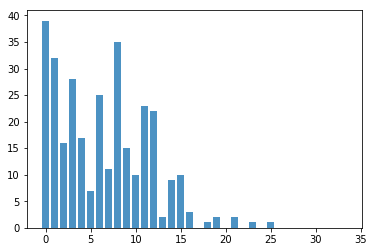

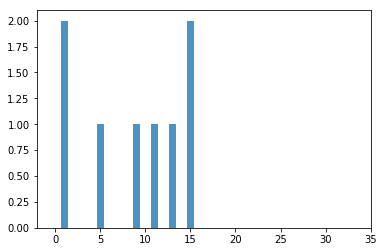

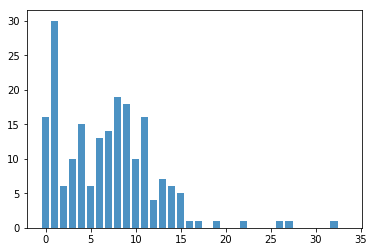

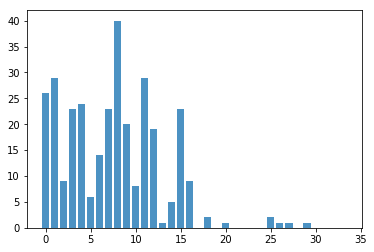

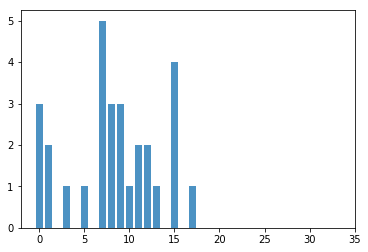

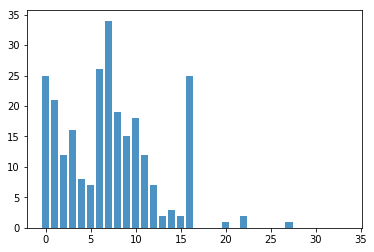

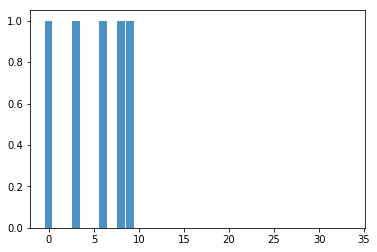

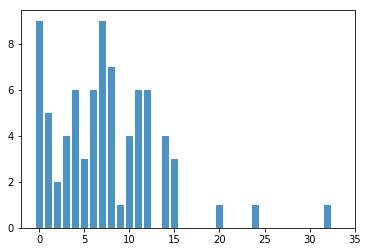

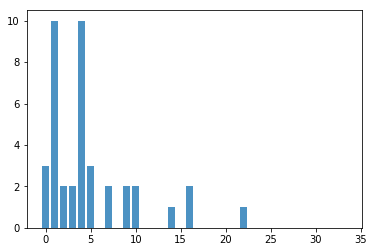

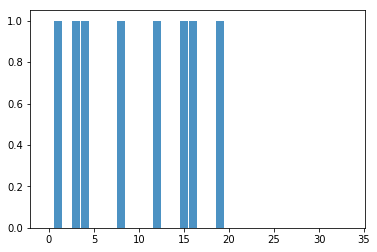

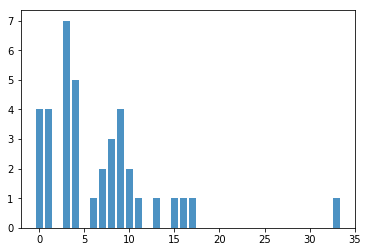

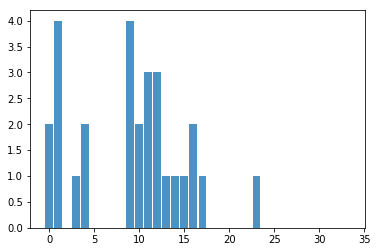

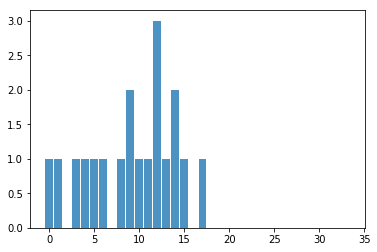

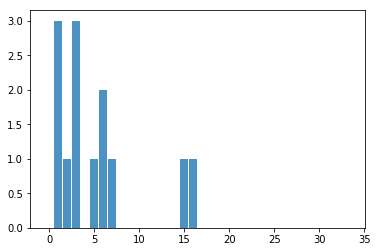

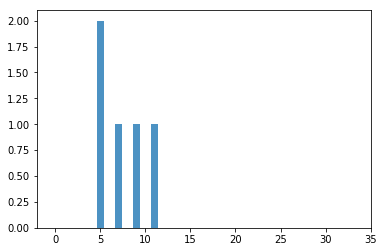

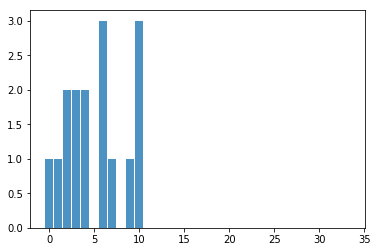

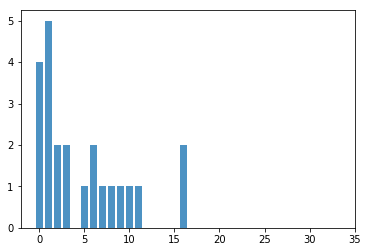

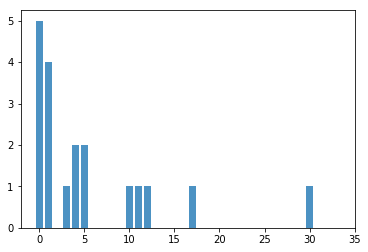

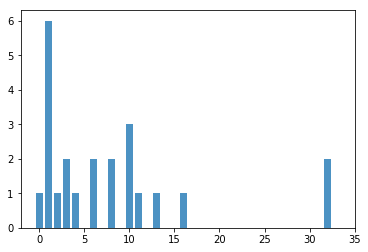

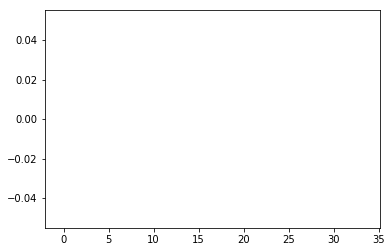

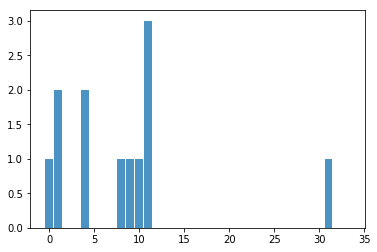

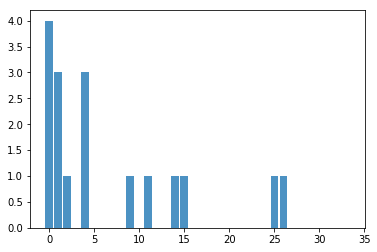

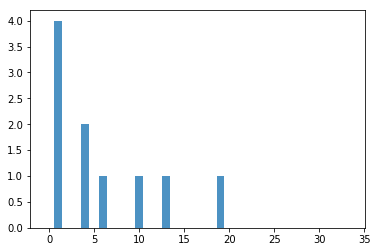

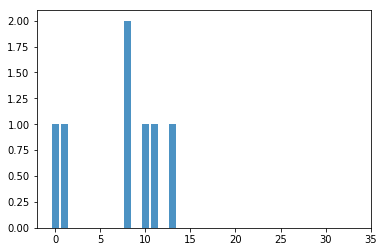

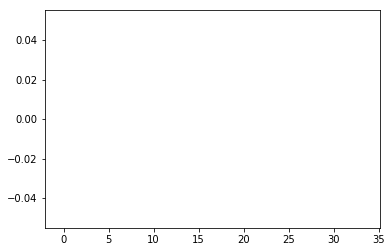

In [118]:
for i in range(35):
    mask = np.ones_like(gr[i])
    mask[np.argmax(gr[i])] = 0
    plt.bar(np.arange(34), gr[i][mask.astype(bool)], alpha = 0.8)
    plt.show()